In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Getting our worklfow ready

### 1. Problem Definition
> Given the data of bulldozer prices based on various parameteres in the past, we need to predict the values of buldozer prizes in the future. Thus, it is a time series regression problem
https://www.kaggle.com/c/bluebook-for-bulldozers/overview

### 2. Data
#### The data is sourced from auction result postings and includes information on usage and equipment configurations.
##### There mainly 3 data-sets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### 3. Features
* There are quite a number of different features available some of which are SalesID, YearMade, MachineHoursCurrentMeter. All features could be looked upon in the Kaggle competition link given under the data section.

### 4. Evaluation
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.Our goal is to minimize RMSLE

In [30]:
df=pd.read_csv("Data/TrainAndValid.csv",low_memory=False)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [32]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

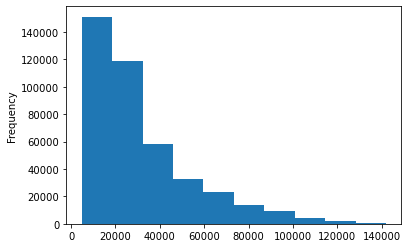

In [33]:
df["SalePrice"].plot.hist();

In [34]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [35]:
df=pd.read_csv("Data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [36]:
df["saledate"].head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [37]:
df["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

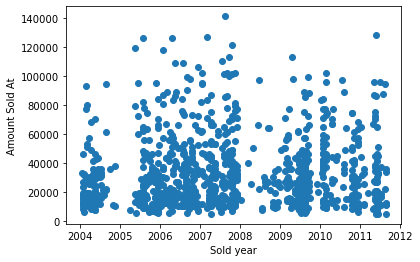

In [38]:
fig,ax=plt.subplots()
ax=plt.scatter(df["saledate"][:1000],df["SalePrice"][:1000])
plt.xlabel("Sold year")
plt.ylabel("Amount Sold At");

In [39]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sort Data According to Sale Date

In [40]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [41]:
df["saledate"]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [42]:
df_copy=df.copy()

In [43]:
df_copy["SaleYear"]=df_copy.saledate.dt.year
df_copy["SaleMonth"]=df_copy.saledate.dt.month
df_copy["SaleDay"]=df_copy.saledate.dt.day
df_copy["SaleDayOfYear"]=df_copy.saledate.dt.dayofyear

In [44]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [45]:
df_copy.drop(["saledate"],axis=1,inplace=True)

In [46]:
df_copy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling

In [47]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,random_state=42)
X=df_copy.drop(["SalePrice"],axis=1)
y=df_copy.SalePrice
model.fit(X,y)

ValueError: could not convert string to float: 'Low'

* Checking Which Columns Are of String Stype

In [48]:
for label,values in df_copy.items():
    if pd.api.types.is_string_dtype(values):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [49]:
for label,values in df_copy.items():
    if pd.api.types.is_string_dtype(values):
        df_copy[label]=values.astype("category")

In [50]:
df_copy["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

## Filling Missing Values

In [51]:
print("Percentage of missing values:")
df_copy.isna().sum()/len(df_copy) *100

Percentage of missing values:


SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [54]:
for label,values in df_copy.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            df_copy[label + "_is_missing"]=pd.isnull(values)
            df_copy[label]=values.fillna(values.median())
         

In [55]:
for label,values in df_copy.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            print(label)

In [56]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [57]:
df_copy.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [58]:
df_copy.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [59]:
df_copy.UsageBand.dtypes

CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=False)

## Fill Rest of The Missing Values

In [60]:
for label, values in df_copy.items():
    if not pd.api.types.is_numeric_dtype(values):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [61]:
for label,values in df_copy.items():
    if not pd.api.types.is_numeric_dtype(values):
        df_copy[label+"_is_missing"] = pd.isnull(values)
        df_copy[label]=pd.Categorical(values).codes + 1

In [62]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [63]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [64]:
%%time
model=RandomForestRegressor(n_jobs=-1,random_state=42)
X=df_copy.drop(["SalePrice"],axis=1)
y=df_copy["SalePrice"]
model.fit(X,y)

Wall time: 4min 17s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [65]:
X.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [66]:
df_copy.MachineHoursCurrentMeter.dtype

dtype('float64')

In [67]:
model.score(X,y)

0.9875586573756172

In [68]:
df_copy.MachineHoursCurrentMeter.isna().sum()

0

## Splitting Data
* Creating our own validation set

In [69]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [70]:
df_copy.SaleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: SaleYear, Length: 412698, dtype: int64

In [71]:
df_val=df_copy[df_copy.SaleYear==2012]
df_train=df_copy[df_copy.SaleYear != 2012]

In [72]:
len(df_val),len(df_train)

(11573, 401125)

In [73]:
X_train,y_train=df_train.drop(["SalePrice"],axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop(["SalePrice"],axis=1),df_val.SalePrice

In [74]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 101), (401125,), (11573, 101), (11573,))

In [75]:
model.score(X_valid,y_valid)

0.9869022481016705

In [76]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_true,y_preds):
    return np.sqrt(mean_squared_log_error(y_true,y_preds))

def show_scores(model):
    train_preds=model.predict(X_train)
    valid_preds=model.predict(X_valid)
    scores={"Training MAE:":mean_absolute_error(y_train,train_preds),
           "Validation MAE:":mean_absolute_error(y_valid,valid_preds),
           "Training RMSLE:":rmsle(y_train,train_preds),
           "Validation RMSLE:":rmsle(y_valid,valid_preds),
           "Training R^2:":r2_score(y_train,train_preds),
           "Validation R^2:":r2_score(y_valid,valid_preds)}
    return scores
 

In [77]:
%%time
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42,
                           max_samples=10000)
model.fit(X_train,y_train)

Wall time: 11.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [78]:
show_scores(model)

{'Training MAE:': 5542.612906400746,
 'Validation MAE:': 7136.034564071546,
 'Training RMSLE:': 0.25692943853249256,
 'Validation RMSLE:': 0.2916290034800644,
 'Training R^2:': 0.8614850681451242,
 'Validation R^2:': 0.8333396272221185}

## Hyper-parameter tuning by Radomized Search CV

In [79]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}
#Initiate Randomized Search CV
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
show_scores(rs_model)

In [80]:
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [81]:
show_scores(ideal_model)

{'Training MAE:': 2973.4300203585058,
 'Validation MAE:': 5963.66117127241,
 'Training RMSLE:': 0.14528744890131343,
 'Validation RMSLE:': 0.2459428079939995,
 'Training R^2:': 0.9583345117764421,
 'Validation R^2:': 0.8820653135116464}

## Make predictions on test data

In [105]:
df_test=pd.read_csv("Data/Test.csv",
                   low_memory=False,
                   parse_dates=["saledate"])
df_test.saledate

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

In [106]:
test_preds=ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

In [107]:
df_test.shape

(12457, 52)

In [108]:
df_copy.shape

(412698, 102)

In [109]:
df.shape

(412698, 53)

## Pre-processing our test data

In [110]:
def preprocess_data(pp_df):
    
    ## Introducing new dates columns
    pp_df["SaleYear"]=pp_df.saledate.dt.year
    pp_df["SaleMonth"]=pp_df.saledate.dt.month
    pp_df["SaleDay"]=pp_df.saledate.dt.day
    pp_df["SaleDayOfYear"]=pp_df.saledate.dt.dayofyear
    pp_df.drop(["saledate"],axis=1,inplace=True)
    ## Changing string data types to categories
    for label,values in pp_df.items():
        if pd.api.types.is_string_dtype(values):
            pp_df[label]=values.astype("category")
    ## Filling numeric values
    for label,values in pp_df.items():
        if pd.api.types.is_numeric_dtype(values):
            if pd.isnull(values).sum():
                pp_df[label + "_is_missing"]=pd.isnull(values)
                pp_df[label]=values.fillna(values.median())
    ## Updating null values of categorical string data
    for label,values in pp_df.items():
        if not pd.api.types.is_numeric_dtype(values):
            pp_df[label+"_is_missing"] = pd.isnull(values)
            pp_df[label]=pd.Categorical(values).codes + 1

    
    
    
    return pp_df

In [111]:
df_test=preprocess_data(df_test)
test_preds=ideal_model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 101 and input n_features is 100 

In [103]:
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

* Manually adjust df_test to have auctioneer_ID_is_missing

In [114]:
df_test["auctioneerID_is_missing"]=False
test_preds=ideal_model.predict(df_test)

In [115]:
test_preds

array([18741.12201711, 18088.67139443, 49627.46235592, ...,
       13104.62295501, 22880.98233415, 31601.21494653])

## Creating a DataFrame(format in which it is required)

In [117]:
df_final=pd.DataFrame()
df_final["SalesID"]=df_test["SalesID"]
df_final["SalesPrice"]=test_preds

In [118]:
df_final

,SalesID,SalesPrice
0,1227829,18741.122017
1,1227844,18088.671394
2,1227847,49627.462356
3,1227848,57877.671076
4,1227863,44162.895240
...,...,...
12452,6643171,41133.094585
12453,6643173,15155.468075
12454,6643184,13104.622955
12455,6643186,22880.982334


In [119]:
df_final.to_csv("BulldozerPredictedPrices")

# Feature Importance

In [121]:
ideal_model.feature_importances_

array([3.42528097e-02, 2.32654072e-02, 4.52574518e-02, 2.15675451e-03,
       3.48364015e-03, 2.02654024e-01, 3.19986384e-03, 1.03200062e-03,
       3.95630000e-02, 4.82278743e-02, 6.34380737e-02, 4.45225236e-03,
       1.93257888e-02, 1.54362289e-01, 4.28072931e-02, 6.21157975e-03,
       3.48746841e-03, 3.10131178e-03, 3.52390548e-03, 5.58728249e-02,
       5.20636937e-04, 5.74782194e-05, 1.02518614e-03, 1.76099652e-04,
       1.37490136e-03, 2.26680743e-05, 5.13841640e-04, 8.57784846e-03,
       3.21647215e-03, 2.54633759e-03, 3.49852561e-03, 1.61185148e-03,
       3.92218122e-03, 3.36984917e-04, 2.65249440e-03, 1.49546910e-02,
       7.87523610e-04, 1.35155858e-02, 1.54705603e-03, 1.45156232e-03,
       9.28679332e-04, 8.23677494e-04, 2.74512591e-03, 6.09941609e-04,
       5.00768604e-04, 3.74385641e-04, 5.29482623e-04, 2.86712851e-03,
       1.64826635e-03, 2.14037569e-04, 4.11495413e-04, 7.32993736e-02,
       3.95599186e-03, 5.94507202e-03, 1.00820779e-02, 2.68192263e-04,
      

In [130]:
def Plot_Feature_Importance(columns,importances,n=20):
    df = (pd.DataFrame({"Features":columns,
                       "Feature_Importance":importances})
                        .sort_values("Feature_Importance",ascending=False)
                         .reset_index(drop=True))
    
    fig,ax=plt.subplots()
    ax.barh(df["Features"][:20], df["Feature_Importance"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()

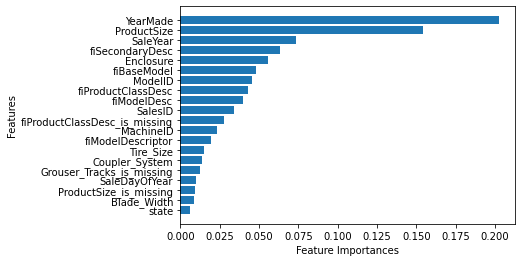

In [131]:
Plot_Feature_Importance(df_test.columns,ideal_model.feature_importances_)